In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv
import os
import numpy as np

In [3]:
df = pd.read_csv('train.csv')

df.head()

,id,label
0,NORMAL-8648239-0004.jpeg,0
1,NORMAL-388586-0003.jpeg,0
2,NORMAL-7824011-0001.jpeg,0
3,NORMAL-8234246-0001.jpeg,0
4,NORMAL-5505017-0001.jpeg,0


## 3883 com pneumonia e 1349 sem, está desbalanceado!

In [4]:
df['label'].value_counts()

label
1    3883
0    1349
Name: count, dtype: int64

In [5]:
path_normal = 'train/train/NORMAL'
path_pneumonia = 'train/train/PNEUMONIA'

df_normals = df[df['label'] == 0] 
df_pneumonia = df[df['label'] == 1] 

df_normals['caminho_completo'] = df_normals['id'].apply(lambda x: os.path.join(path_normal, x))
df_pneumonia['caminho_completo'] = df_pneumonia['id'].apply(lambda x: os.path.join(path_pneumonia, x))

df_final = pd.concat([df_normals, df_pneumonia], ignore_index=True)

## Boa diferença entre média e mediana, então os tamanhos das imagens não são fixos, nem quadrados

In [6]:
alturas, larguras = [], []
for caminho in df_final['caminho_completo']:
    img = cv.imread(caminho)
    props = img.shape
    alturas.append(props[0])
    larguras.append(props[1])

In [7]:
for i in [alturas, larguras]:
    print(f'''Mínimo: {np.min(i)}
Máximo: {np.max(i)}
Média: {np.mean(i)}
Mediana: {np.median(i)}
''') 

Mínimo: 127
Máximo: 2663
Média: 968.1813837920489
Mediana: 888.0

Mínimo: 384
Máximo: 2916
Média: 1320.6953363914374
Mediana: 1284.0



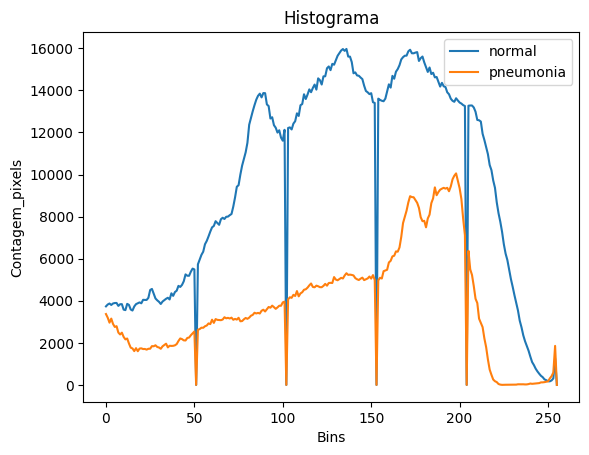

In [11]:
imagem_normal = cv.imread(df_normals['caminho_completo'].iloc[0])
imagem_pneumonia = cv.imread(df_pneumonia['caminho_completo'].iloc[0])

hist_n = cv.calcHist([imagem_normal], [0], None, [256], [5,256])
hist_p = cv.calcHist([imagem_pneumonia], [0], None, [256], [5,256])

plt.plot(hist_n, label='normal')
plt.plot(hist_p, label='pneumonia')
plt.title("Histograma")
plt.xlabel('Bins')
plt.ylabel('Contagem_pixels')
plt.legend()

plt.show()

In [10]:
df_final.to_csv('trainEDA.csv')